In [1]:
from cbio_py import cbio_mod as cb
import json
import pandas as pd
import numpy as np

In [2]:
df_patients = cb.getAllPatientsInStudy('msk_ch_2020')
df_patients = pd.DataFrame.from_dict(df_patients, orient='columns')
df_patients.head(2)

,cancerStudy,patientId,studyId,uniquePatientKey,uniqueSampleKey
0,None,P-0000004,msk_ch_2020,UC0wMDAwMDA0Om1za19jaF8yMDIw,None
1,None,P-0000015,msk_ch_2020,UC0wMDAwMDE1Om1za19jaF8yMDIw,None


In [3]:
df_att = cb.getClinicalAttributesByStudyId('msk_ch_2020')
df_att = pd.DataFrame.from_dict(df_att, orient='columns')
df_att

,clinicalAttributeId,datatype,description,displayName,patientAttribute,priority,studyId
0,AGE,NUMBER,Age,Age,True,1,msk_ch_2020
1,ALKYLATING_TX,STRING,Alkylating agent treatment prior to sequencing,Alkylating Agent Treatment,True,0,msk_ch_2020
2,ALL_TX_AT_MSK,STRING,Whether the patient received all cancer threra...,All therapy at MSKCC,True,0,msk_ch_2020
3,ANTHRACYCLINE_TX,STRING,Anthracycline treatment prior to sequencing,Anthracycline Treatment,True,0,msk_ch_2020
4,ANTIMETABOLITE_TX,STRING,Anitimetabolite treatment prior to sequencing,Antimetobolite Treatment,True,0,msk_ch_2020
5,CANCER_TYPE,STRING,Cancer Type,Cancer Type,False,1,msk_ch_2020
6,CANCER_TYPE_DETAILED,STRING,Cancer Type Detailed,Cancer Type Detailed,False,1,msk_ch_2020
7,CARBOPLATIN_TX,STRING,Carboplatin treatment prior to sequencing,Carboplatin Treatment,True,0,msk_ch_2020
8,CHEMO_TX,STRING,Chemotherapy treatment prior to sequencing,Chemotherapy Treatment,True,0,msk_ch_2020
9,CISPLATIN_TX,STRING,Cisplatin treatment prior to sequencing,Cisplatin Treatment,True,0,msk_ch_2020


In [4]:
df_clinical_data = cb.GetPatientClinicalDataForSpecificStudyPOST('msk_ch_2020', df_att.clinicalAttributeId.to_list(), df_patients.patientId.to_list())
df_clinical_data = pd.DataFrame.from_dict(df_clinical_data, orient='columns').pivot(columns='clinicalAttributeId', index='patientId', values='value')
df_clinical_data

clinicalAttributeId,AGE,ALKYLATING_TX,ALL_TX_AT_MSK,ANTHRACYCLINE_TX,ANTIMETABOLITE_TX,CARBOPLATIN_TX,CHEMO_TX,CISPLATIN_TX,CYTOTOXIC_TX,EQD_TERTILES,...,TERT_TARGETED_TX,TERT_TAXANE_TX,TERT_TOPO_II_INH_TX,TERT_TOPO_I_INH_TX,TIME_FROM_DX_TO_SEQ,TIME_TO_BLOOD_DRAW_FROM_TX,TOPO_II_TX,TOPO_I_TX,TREATMENT_STATUS,XRT_TX
patientId,,,,,,,,,,,,,,,,,,,,,
P-0000004,39.7399025,Yes,No,NaN,Yes,NaN,Yes,Yes,Yes,1st tertile,...,NaN,NaN,NaN,NaN,991,609,NaN,NaN,Unknown,Yes
P-0000015,44.44079208,NaN,No,NaN,Yes,NaN,Yes,NaN,Yes,No radiation,...,3rd tertile,NaN,NaN,NaN,2558,5,NaN,NaN,Unknown,No
P-0000023,61.31964493,Yes,No,NaN,Yes,NaN,Yes,Yes,Yes,NaN,...,NaN,NaN,NaN,NaN,245,166,NaN,NaN,Unknown,NaN
P-0000024,61.34428406,NaN,No,NaN,NaN,Yes,Yes,NaN,Yes,NaN,...,NaN,2nd tertile,NaN,NaN,6313,91,NaN,NaN,Unknown,NaN
P-0000025,72.67350769,No,Yes,No,No,Yes,Yes,No,Yes,No radiation,...,2nd tertile,3rd tertile,No treatment,No treatment,1161,1097,No,No,Treated,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P-0031337,72.75016785,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Unknown,NaN
P-0031338,57.63723373,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,338,NaN,NaN,NaN,Unknown,NaN
P-0031340,66.74332428,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,Unknown,NaN


In [5]:
df_cancer_type = cb.getAllClinicalDataInStudy('msk_ch_2020')
df_cancer_type = pd.DataFrame.from_dict(df_cancer_type, orient='columns').pivot(columns='clinicalAttributeId', index='patientId', values='value')
df_cancer_type.head(2)

clinicalAttributeId,CANCER_TYPE,CANCER_TYPE_DETAILED,MUTATION_COUNT,ONCOTREE_CODE,TMB_NONSYNONYMOUS
patientId,,,,,
P-0000004,Breast Cancer,Invasive Breast Carcinoma,2,BRCA,0.066666667
P-0000015,Breast Cancer,Invasive Breast Carcinoma,NaN,BRCA,NaN


In [6]:
df_clinical_data = pd.merge(df_cancer_type, df_clinical_data, right_index=True, left_index=True)


In [7]:
df_clinical_data['MUTATION_COUNT'] = df_clinical_data['MUTATION_COUNT'].astype(pd.Int64Dtype())
df_clinical_data['TMB_NONSYNONYMOUS'] = df_clinical_data['TMB_NONSYNONYMOUS'].astype(float)
df_clinical_data['AGE'] = df_clinical_data['AGE'].astype(float)
df_clinical_data['TIME_FROM_DX_TO_SEQ'] = df_clinical_data['TIME_FROM_DX_TO_SEQ'].astype(pd.Int64Dtype())
df_clinical_data['TIME_TO_BLOOD_DRAW_FROM_TX'] = df_clinical_data['TIME_TO_BLOOD_DRAW_FROM_TX'].astype(pd.Int64Dtype())
df_clinical_data.head(2)

clinicalAttributeId,CANCER_TYPE,CANCER_TYPE_DETAILED,MUTATION_COUNT,ONCOTREE_CODE,TMB_NONSYNONYMOUS,AGE,ALKYLATING_TX,ALL_TX_AT_MSK,ANTHRACYCLINE_TX,ANTIMETABOLITE_TX,...,TERT_TARGETED_TX,TERT_TAXANE_TX,TERT_TOPO_II_INH_TX,TERT_TOPO_I_INH_TX,TIME_FROM_DX_TO_SEQ,TIME_TO_BLOOD_DRAW_FROM_TX,TOPO_II_TX,TOPO_I_TX,TREATMENT_STATUS,XRT_TX
patientId,,,,,,,,,,,,,,,,,,,,,
P-0000004,Breast Cancer,Invasive Breast Carcinoma,2,BRCA,0.066667,39.739902,Yes,No,NaN,Yes,...,NaN,NaN,NaN,NaN,991,609,NaN,NaN,Unknown,Yes
P-0000015,Breast Cancer,Invasive Breast Carcinoma,<NA>,BRCA,NaN,44.440792,NaN,No,NaN,Yes,...,3rd tertile,NaN,NaN,NaN,2558,5,NaN,NaN,Unknown,No


In [8]:
df_clinical_data.columns.__len__()

50

In [9]:
sample_list = pd.DataFrame.from_dict(cb.getAllSamplesList(), orient='columns')
sample_list = sample_list.loc[sample_list['studyId']=='msk_ch_2020', 'sampleListId']
sample_list

860          msk_ch_2020_all
861    msk_ch_2020_sequenced
Name: sampleListId, dtype: object

In [10]:
df_mut = pd.DataFrame.from_dict(cb.getMutationsInMolecularProfile('msk_ch_2020_mutations', 'msk_ch_2020_sequenced', projection='SUMMARY', return_type = 'dict', append='no'), orient='columns')[['patientId', 'keyword', 'mutationType', 'proteinChange', 'driverFilter', 'driverFilterAnnotation', 'chr', 'variantAllele', 'variantType']]
df_mut.head(2)

,patientId,keyword,mutationType,proteinChange,driverFilter,driverFilterAnnotation,chr,variantAllele,variantType
0,P-0017300,PIK3CA H1047 missense,Missense_Mutation,H1047R,Putative_Driver,CH putative driver,3,G,SNP
1,P-0005159,TP53 V173 missense,Missense_Mutation,V173L,Putative_Driver,CH putative driver,17,A,SNP


In [11]:
df_mut.mutationType.value_counts()

Missense_Mutation         6124
Nonsense_Mutation         1380
Frame_Shift_Del           1182
Splice_Site                537
Frame_Shift_Ins            457
In_Frame_Del                74
5'Flank                     33
In_Frame_Ins                14
Translation_Start_Site       6
Nonstop_Mutation             4
Splice_Region                2
Name: mutationType, dtype: int64

In [12]:
df_clinical_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24146 entries, P-0000004 to P-0031342
Data columns (total 50 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CANCER_TYPE                 24037 non-null  object 
 1   CANCER_TYPE_DETAILED        24037 non-null  object 
 2   MUTATION_COUNT              6649 non-null   Int64  
 3   ONCOTREE_CODE               24146 non-null  object 
 4   TMB_NONSYNONYMOUS           7216 non-null   float64
 5   AGE                         24146 non-null  float64
 6   ALKYLATING_TX               11111 non-null  object 
 7   ALL_TX_AT_MSK               24146 non-null  object 
 8   ANTHRACYCLINE_TX            10898 non-null  object 
 9   ANTIMETABOLITE_TX           11975 non-null  object 
 10  CARBOPLATIN_TX              10999 non-null  object 
 11  CHEMO_TX                    14400 non-null  object 
 12  CISPLATIN_TX                10807 non-null  object 
 13  CYTOTOXIC_TX            

In [13]:
df_mut.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   patientId               9813 non-null   object
 1   keyword                 9730 non-null   object
 2   mutationType            9813 non-null   object
 3   proteinChange           9813 non-null   object
 4   driverFilter            9813 non-null   object
 5   driverFilterAnnotation  9813 non-null   object
 6   chr                     9813 non-null   object
 7   variantAllele           9813 non-null   object
 8   variantType             9813 non-null   object
dtypes: object(9)
memory usage: 690.1+ KB


In [14]:
df_mut[df_mut['keyword'].isna()]

,patientId,keyword,mutationType,proteinChange,driverFilter,driverFilterAnnotation,chr,variantAllele,variantType
348,P-0006034,None,In_Frame_Del,P95_R102del,Putative_Driver,CH putative driver,17,-,DEL
2524,P-0016497,None,5'Flank,Promoter,Putative_Driver,CH putative driver,5,A,SNP
2525,P-0019194,None,5'Flank,Promoter,Putative_Driver,CH putative driver,5,A,SNP
2526,P-0020143,None,5'Flank,Promoter,Putative_Driver,CH putative driver,5,A,SNP
2527,P-0020312,None,5'Flank,Promoter,Putative_Driver,CH putative driver,5,A,SNP
...,...,...,...,...,...,...,...,...,...
9096,P-0026766,None,In_Frame_Del,N947_V950del,Putative_Driver,CH putative non-driver,5,-,DEL
9205,P-0007496,None,In_Frame_Del,S288_P292del,Putative_Driver,CH putative non-driver,6,-,DEL
9321,P-0004687,None,In_Frame_Del,G996_K1001del,Putative_Driver,CH putative non-driver,7,-,DEL
9617,P-0027163,None,In_Frame_Ins,D432_R435dup,Putative_Driver,CH putative non-driver,23,AGGGACCGCAGC,INS


In [15]:
df_clinical_data.describe(include=np.number, datetime_is_numeric=True, percentiles=[0.25, 0.5, 0.75, 0.95, 0.99, 0.995])

clinicalAttributeId,MUTATION_COUNT,TMB_NONSYNONYMOUS,AGE,TIME_FROM_DX_TO_SEQ,TIME_TO_BLOOD_DRAW_FROM_TX
count,6649.000000,7216.000000,24146.000000,24145.000000,8185.000000
mean,1.475861,0.045154,59.110904,1116.579375,969.368479
std,0.839601,0.029875,15.624480,1943.390412,1608.696471
min,1.000000,0.000000,0.128679,0.000000,0.000000
25%,1.000000,0.033333,50.995893,35.000000,68.000000
50%,1.000000,0.033333,61.336071,288.000000,351.000000
75%,2.000000,0.066667,69.883644,1309.000000,1099.000000
95%,3.000000,0.100000,80.281313,5162.400000,4359.400000
99%,5.000000,0.166667,86.650786,9042.080000,8140.360000
99.5%,5.000000,0.166667,88.690693,10972.360000,8967.000000


In [16]:
df_clinical_data.columns

Index(['CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'MUTATION_COUNT',
       'ONCOTREE_CODE', 'TMB_NONSYNONYMOUS', 'AGE', 'ALKYLATING_TX',
       'ALL_TX_AT_MSK', 'ANTHRACYCLINE_TX', 'ANTIMETABOLITE_TX',
       'CARBOPLATIN_TX', 'CHEMO_TX', 'CISPLATIN_TX', 'CYTOTOXIC_TX',
       'EQD_TERTILES', 'FOLIC_ACID_TX', 'IO_TX', 'MICROTUBULE_TX',
       'NUCLEOSIDE_TX', 'OTHER_CYTOTOXIC_TX', 'OXALIPLATIN_TX', 'PLATINUM_TX',
       'RACE', 'RADIOTHERAPY_TX', 'SAMPLE_COUNT', 'SEX', 'SMOKING_STATUS',
       'TARGETED_TX', 'TAXANE_TX', 'TERT_ALKYLATING_TX',
       'TERT_ANTHRACYCLINE_TX', 'TERT_ANTIMETABOLITE_TX', 'TERT_CARBOLATIN_TX',
       'TERT_CISPLATIN_TX', 'TERT_CYTOTOXIC_TX', 'TERT_IO_TX',
       'TERT_MICROTUBULE_TX', 'TERT_OTHER_CYTOTOXIC_TX', 'TERT_OXALIPLATIN_TX',
       'TERT_PLATINUM_TX', 'TERT_TARGETED_TX', 'TERT_TAXANE_TX',
       'TERT_TOPO_II_INH_TX', 'TERT_TOPO_I_INH_TX', 'TIME_FROM_DX_TO_SEQ',
       'TIME_TO_BLOOD_DRAW_FROM_TX', 'TOPO_II_TX', 'TOPO_I_TX',
       'TREATMENT_STATUS', '

In [17]:
df_cd_info = pd.DataFrame()
for col in df_clinical_data.columns:
    if df_clinical_data[col].dtype == pd.Int64Dtype() or df_clinical_data[col].dtype == float:
        pass
    else:
        df_cd_info = pd.concat([df_cd_info, pd.Series(data=df_clinical_data[col].unique(), name=col)], axis=1)
df_cd_info

,CANCER_TYPE,CANCER_TYPE_DETAILED,ONCOTREE_CODE,ALKYLATING_TX,ALL_TX_AT_MSK,ANTHRACYCLINE_TX,ANTIMETABOLITE_TX,CARBOPLATIN_TX,CHEMO_TX,CISPLATIN_TX,...,TERT_OXALIPLATIN_TX,TERT_PLATINUM_TX,TERT_TARGETED_TX,TERT_TAXANE_TX,TERT_TOPO_II_INH_TX,TERT_TOPO_I_INH_TX,TOPO_II_TX,TOPO_I_TX,TREATMENT_STATUS,XRT_TX
0,Breast Cancer,Invasive Breast Carcinoma,BRCA,Yes,No,NaN,Yes,NaN,Yes,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Yes
1,Mesothelioma,Peritoneal Mesothelioma,PEMESO,NaN,Yes,No,NaN,Yes,NaN,NaN,...,No treatment,3rd tertile,3rd tertile,2nd tertile,No treatment,No treatment,No,No,Treated,No
2,Endometrial Cancer,Other Uterine Tumor,OUTT,No,NaN,Yes,No,No,No,No,...,2nd tertile,2nd tertile,2nd tertile,3rd tertile,1st tertile,3rd tertile,Yes,Yes,Untreated,NaN
3,Bladder Cancer,Bladder Adenocarcinoma,BLAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3rd tertile,1st tertile,No treatment,No treatment,3rd tertile,1st tertile,NaN,NaN,NaN,NaN
4,Hepatobiliary Cancer,Hepatocellular Carcinoma,HCC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1st tertile,No treatment,1st tertile,1st tertile,2nd tertile,2nd tertile,NaN,NaN,NaN,NaN
5,Esophagogastric Cancer,Esophagogastric Adenocarcinoma,EGC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Ovarian Cancer,Clear Cell Borderline Ovarian Tumor,CCBOV,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Uterine Sarcoma,Endometrial Stromal Sarcoma,ESS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Germ Cell Tumor,Choriocarcinoma,BCCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Non-Small Cell Lung Cancer,Atypical Lung Carcinoid,ALUCA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Descartamos pacientes cuyo tratamiento es desconocido:
tmt_cols = ['ALKYLATING_TX',
       'ANTHRACYCLINE_TX', 'ANTIMETABOLITE_TX',
       'CARBOPLATIN_TX', 'CHEMO_TX', 'CISPLATIN_TX', 'CYTOTOXIC_TX',
       'FOLIC_ACID_TX', 'IO_TX', 'MICROTUBULE_TX',
       'NUCLEOSIDE_TX', 'OTHER_CYTOTOXIC_TX', 'OXALIPLATIN_TX', 'PLATINUM_TX',
       'RACE', 'RADIOTHERAPY_TX',
       'TARGETED_TX', 'TAXANE_TX', 'TERT_ALKYLATING_TX',
       'TERT_ANTHRACYCLINE_TX', 'TERT_ANTIMETABOLITE_TX', 'TERT_CARBOLATIN_TX',
       'TERT_CISPLATIN_TX', 'TERT_CYTOTOXIC_TX', 'TERT_IO_TX',
       'TERT_MICROTUBULE_TX', 'TERT_OTHER_CYTOTOXIC_TX', 'TERT_OXALIPLATIN_TX',
       'TERT_PLATINUM_TX', 'TERT_TARGETED_TX', 'TERT_TAXANE_TX',
       'TERT_TOPO_II_INH_TX', 'TERT_TOPO_I_INH_TX', 'TIME_FROM_DX_TO_SEQ',
       'TIME_TO_BLOOD_DRAW_FROM_TX', 'TOPO_II_TX', 'TOPO_I_TX',
       'TREATMENT_STATUS', 'XRT_TX']
df_clinical_data[tmt_cols].isna().all(axis=1).value_counts()

#Todos tienen un tratamiento conocido

False    24146
dtype: int64

In [19]:
df_clinical_data.loc['P-0000299', :]

clinicalAttributeId
CANCER_TYPE                   Non-Small Cell Lung Cancer
CANCER_TYPE_DETAILED             Atypical Lung Carcinoid
MUTATION_COUNT                                      <NA>
ONCOTREE_CODE                                      ALUCA
TMB_NONSYNONYMOUS                                    NaN
AGE                                            66.409309
ALKYLATING_TX                                         No
ALL_TX_AT_MSK                                        Yes
ANTHRACYCLINE_TX                                      No
ANTIMETABOLITE_TX                                     No
CARBOPLATIN_TX                                        No
CHEMO_TX                                              No
CISPLATIN_TX                                          No
CYTOTOXIC_TX                                          No
EQD_TERTILES                                No radiation
FOLIC_ACID_TX                                         No
IO_TX                                                 No
MICROTUBULE

`NOTAS`
1. Pacientes deben ser únicos y de hecho lo son porque son los índices del dataframe
2. Podemos enfocar el modelo en estimar la mutación más probable o la combinación de mutaciones más probables
3. Podemos basar el modelo en sí a recibido un tratamiento o no, o en la cantidad de tratamiento recibido (usar o variables de tratamiento Si/No o las TERT pero no ambas)
4. Revisadas las variables numéricas y no hay outliers
5. Hay una falta de datos de los tertiles: en el análisis de missing values nos damos cuenta que no siempre que se marca haber recibido un tratamiento se indican los tertiles, entonces podemos plantear el modelo de tertiles solo en los casos en los que estén correctamente cumplimentados, habría que estudiar cuántos datos dejaríamos de lado en este caso o rellenar con media/mediana

In [20]:
df_clinical_data.replace('No treatment', 'No', inplace=True)

In [21]:
df_clinical_data.isna().sum()

clinicalAttributeId
CANCER_TYPE                     109
CANCER_TYPE_DETAILED            109
MUTATION_COUNT                17497
ONCOTREE_CODE                     0
TMB_NONSYNONYMOUS             16930
AGE                               0
ALKYLATING_TX                 13035
ALL_TX_AT_MSK                     0
ANTHRACYCLINE_TX              13248
ANTIMETABOLITE_TX             12171
CARBOPLATIN_TX                13147
CHEMO_TX                       9746
CISPLATIN_TX                  13339
CYTOTOXIC_TX                  10743
EQD_TERTILES                  11953
FOLIC_ACID_TX                 13558
IO_TX                         13324
MICROTUBULE_TX                13683
NUCLEOSIDE_TX                 12509
OTHER_CYTOTOXIC_TX            13880
OXALIPLATIN_TX                13490
PLATINUM_TX                   12215
RACE                           1065
RADIOTHERAPY_TX               13887
SAMPLE_COUNT                      0
SEX                               0
SMOKING_STATUS                  932
TARGETED

In [22]:
df_clinical_data.MUTATION_COUNT.value_counts(dropna=False)
df_clinical_data.MUTATION_COUNT=df_clinical_data.MUTATION_COUNT.fillna(0)
df_clinical_data.MUTATION_COUNT.value_counts(dropna=False)

0       17497
1        4509
2        1459
3         450
4         149
5          57
6          20
7           5
<NA>        0
Name: MUTATION_COUNT, dtype: Int64

<Axes: >

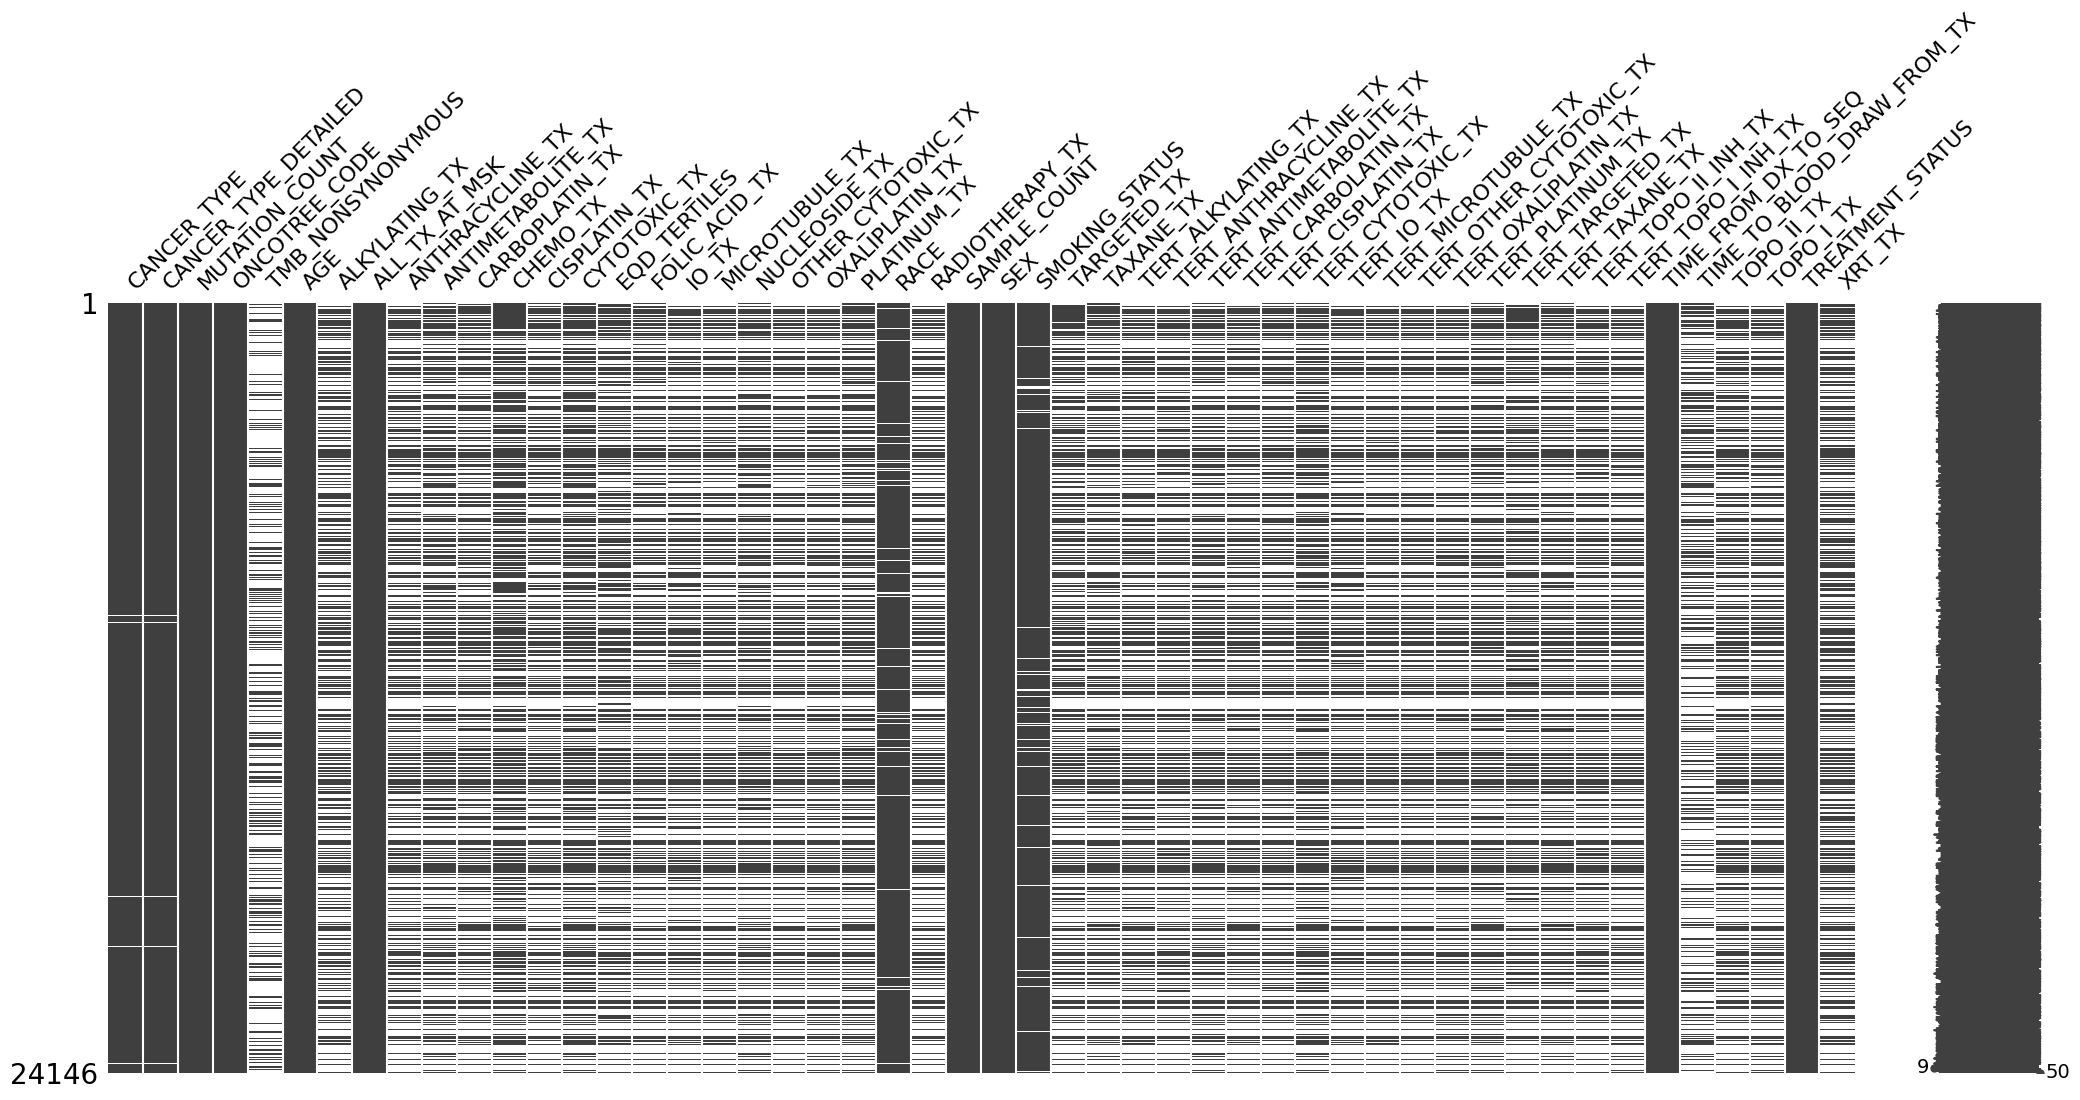

In [23]:
import missingno as msno
%matplotlib inline
msno.matrix(df_clinical_data)

<Axes: xlabel='clinicalAttributeId'>

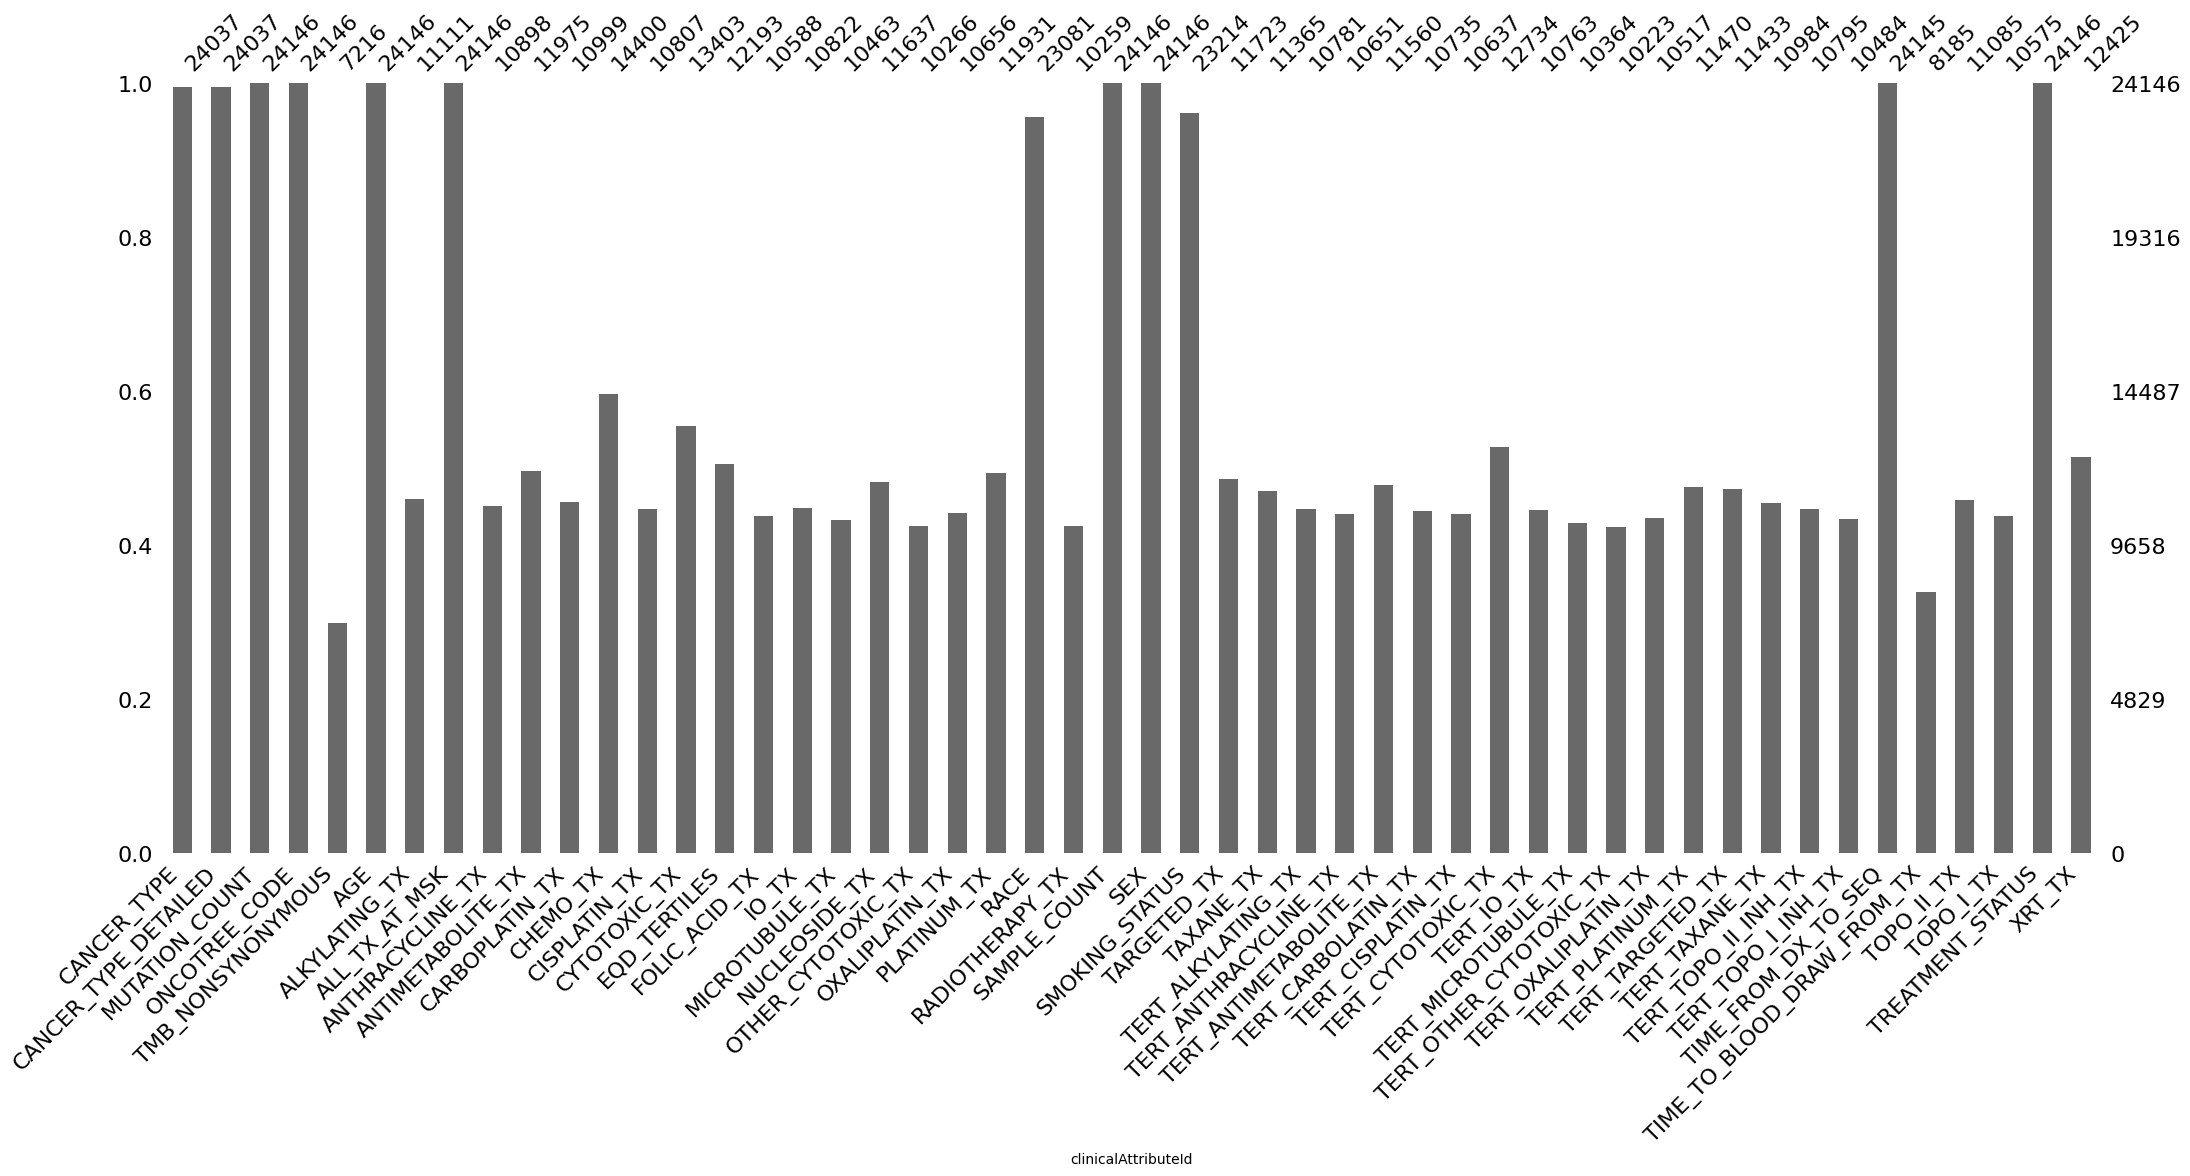

In [24]:
msno.bar(df_clinical_data)

<Axes: xlabel='clinicalAttributeId', ylabel='clinicalAttributeId'>

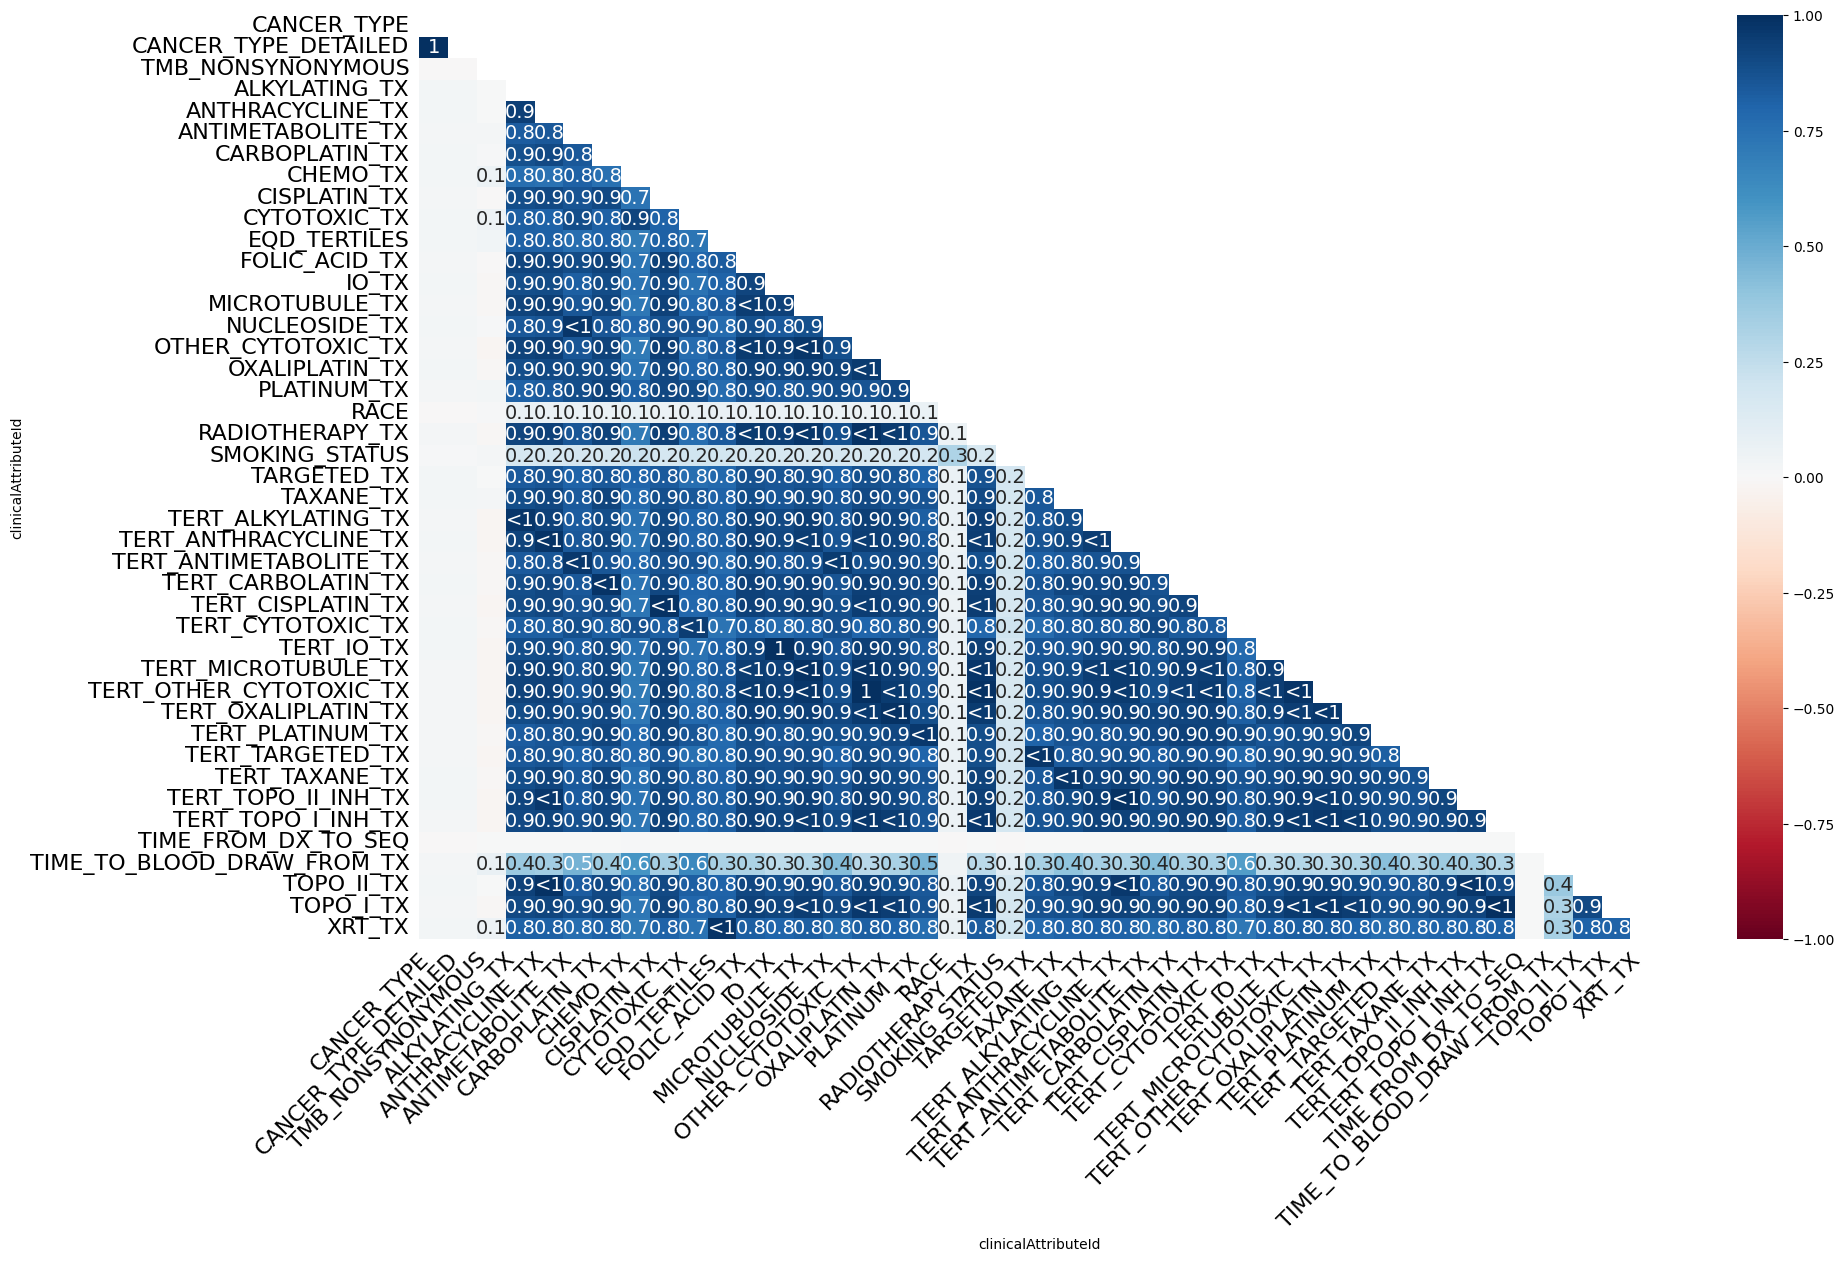

In [25]:
msno.heatmap(df_clinical_data)

<Axes: >

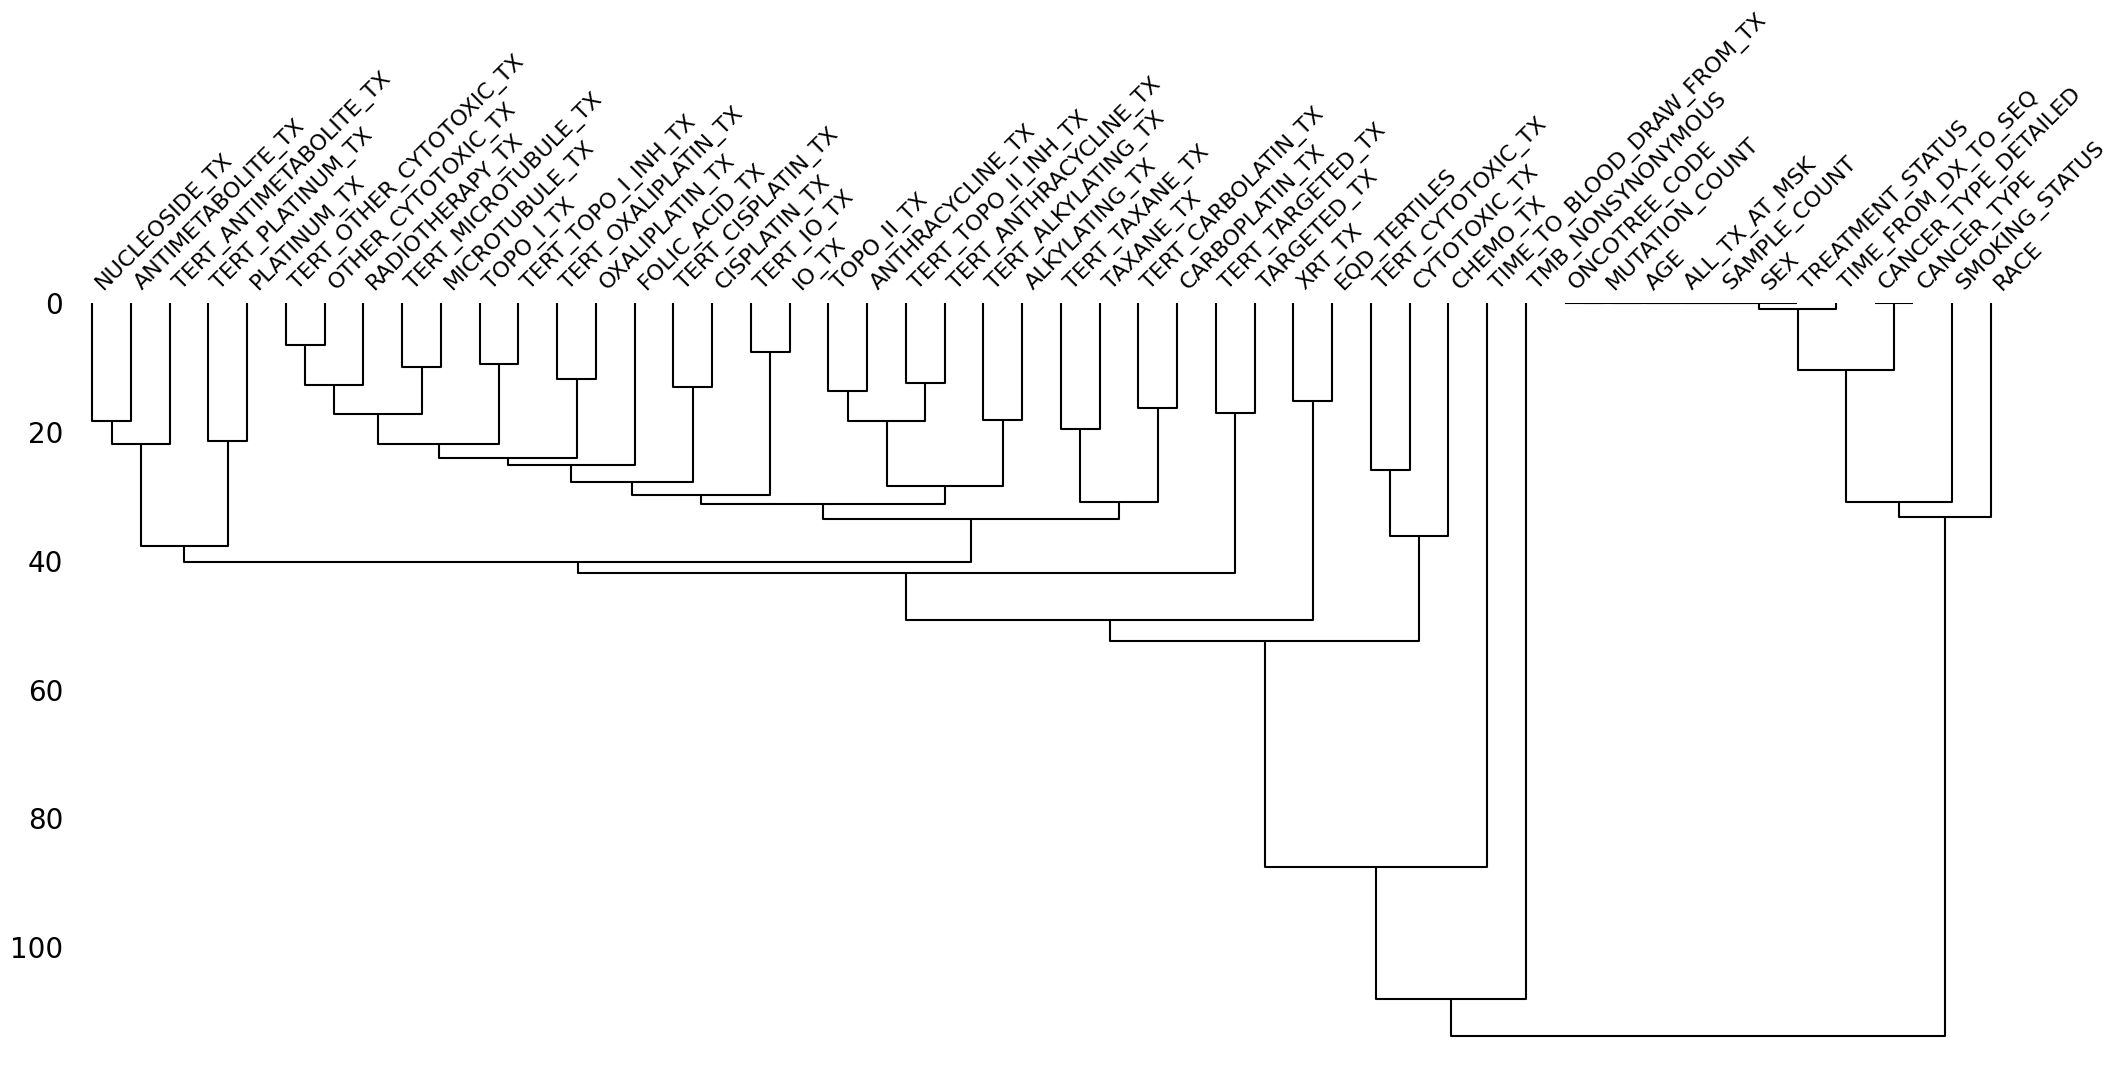

In [26]:
msno.dendrogram(df_clinical_data)

In [27]:
#clasificación de columnas:
#mutation_count = 100% correlacionado con TMB
general_info_cols = ['CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'MUTATION_COUNT', 'AGE', 'RACE', 'SEX', 'SMOKING_STATUS', 'TIME_FROM_DX_TO_SEQ', 'TIME_TO_BLOOD_DRAW_FROM_TX']
tmt_y_n_col = ['ALKYLATING_TX', 'ANTHRACYCLINE_TX', 'ANTIMETABOLITE_TX',
       'CARBOPLATIN_TX', 'CHEMO_TX', 'CISPLATIN_TX', 'CYTOTOXIC_TX','FOLIC_ACID_TX', 'IO_TX', 'MICROTUBULE_TX',
       'NUCLEOSIDE_TX', 'OTHER_CYTOTOXIC_TX', 'OXALIPLATIN_TX', 'PLATINUM_TX',
       'RADIOTHERAPY_TX', 'TARGETED_TX', 'TAXANE_TX', 'TOPO_II_TX', 'TOPO_I_TX', 'XRT_TX']
tmt_tertile_col = ['TERT_ALKYLATING_TX',
       'TERT_ANTHRACYCLINE_TX', 'TERT_ANTIMETABOLITE_TX', 'TERT_CARBOLATIN_TX',
       'TERT_CISPLATIN_TX', 'TERT_CYTOTOXIC_TX', 'TERT_IO_TX',
       'TERT_MICROTUBULE_TX', 'TERT_OTHER_CYTOTOXIC_TX', 'TERT_OXALIPLATIN_TX',
       'TERT_PLATINUM_TX', 'TERT_TARGETED_TX', 'TERT_TAXANE_TX',
       'TERT_TOPO_II_INH_TX', 'TERT_TOPO_I_INH_TX']

In [28]:
df_mut.keyword.value_counts()

DNMT3A truncating       1189
PPM1D truncating         695
TET2 truncating          571
ASXL1 truncating         288
DNMT3A R882 missense     239
                        ... 
RIT1 A29 missense          1
NTRK1 R116 missense        1
NTRK1 N269 missense        1
NTRK1 S474 missense        1
CDK8 V128 missense         1
Name: keyword, Length: 4101, dtype: int64

In [29]:
columns_pairs = dict()
columns_pairs['cancer'] = ['CANCER_TYPE', 'CANCER_TYPE_DETAILED']
columns_pairs['mut_num'] = ['MUTATION_COUNT', 'TMB_NONSYNONYMOUS']
columns_pairs['tmt'] = [['ALKYLATING_TX', 'TERT_ALKYLATING_TX'],
['ANTHRACYCLINE_TX', 'TERT_ANTHRACYCLINE_TX'],
['ANTIMETABOLITE_TX', 'TERT_ANTIMETABOLITE_TX'],
['CARBOPLATIN_TX', 'TERT_CARBOLATIN_TX'],
['CISPLATIN_TX', 'TERT_CISPLATIN_TX'],
['CYTOTOXIC_TX', 'TERT_CYTOTOXIC_TX'],
['IO_TX', 'TERT_IO_TX'],
['MICROTUBULE_TX', 'TERT_MICROTUBULE_TX'],
['OTHER_CYTOTOXIC_TX', 'TERT_OTHER_CYTOTOXIC_TX'],
['OXALIPLATIN_TX', 'TERT_OXALIPLATIN_TX'],
['PLATINUM_TX', 'TERT_PLATINUM_TX'],
['TARGETED_TX', 'TERT_TARGETED_TX'],
['TAXANE_TX', 'TERT_TAXANE_TX'],
['TOPO_I_TX', 'TERT_TOPO_I_INH_TX'],
['TOPO_II_TX', 'TERT_TOPO_II_INH_TX'],
['MICROTUBULE_TX', 'TERT_MICROTUBULE_TX'],
['MICROTUBULE_TX', 'TERT_MICROTUBULE_TX']]

#AGE, CHEMO_TX, EQD_TERTILES, FOLIC_ACID_TX, NUCLEOSIDE_TX, RACE, RADIOTHERAPY_TX, SEX, SMOKING_STATUS, TIME_FROM_DX_TO_SEQ, TIME_TO_BLOOD_DRAW_FROM_TX, 'TREATMENT_STATUS', 'XRT_TX'
#drop ALL_TX_AT_MSK

In [30]:
for tmt_lists in columns_pairs['tmt']:
    df_clinical_data.loc[((df_clinical_data[tmt_lists[0]].isna())|(df_clinical_data[tmt_lists[0]]=='No'))&(df_clinical_data[tmt_lists[1]].str.endswith('tertile')), tmt_lists[0][0:3]+"_val"]=False
    df_clinical_data[tmt_lists[0][0:3]+"_val"].fillna(True, inplace=True)
    try:
        df_clinical_data[tmt_lists[0][0:3]+'_val'].value_counts()[False]
        print(tmt_lists[0][0:3]+"_val"+f": {df_clinical_data[tmt_lists[0][0:3]+'_val'].value_counts()[False]}")
    except:
        pass

In [31]:
df_clinical_data.loc[(df_clinical_data[columns_pairs['cancer'][0]].isna()&df_clinical_data[columns_pairs['cancer'][1]].notna())|(df_clinical_data[columns_pairs['cancer'][1]].isna()&df_clinical_data[columns_pairs['cancer'][0]].notna()), 'cancer_val']=False
df_clinical_data['cancer_val'].fillna(True, inplace=True)
try:
    df_clinical_data['cancer_val'].value_counts()[False]
    print("cancer_val"+f": {df_clinical_data['cancer_val']}")
except:
    pass

In [32]:
df_clinical_data.loc[((df_clinical_data[columns_pairs['mut_num'][0]]!=0)&df_clinical_data[columns_pairs['mut_num'][1]].isna())|(df_clinical_data[columns_pairs['mut_num'][1]].isna()&(df_clinical_data[columns_pairs['mut_num'][0]]!=0)), 'mut_num_val']=False
df_clinical_data['mut_num_val'].fillna(True, inplace=True)
try:
    df_clinical_data['mut_num_val'].value_counts()[False]
    print("mut_num_val"+f": {df_clinical_data['mut_num_val']}")
except:
    pass

In [33]:
#AGE, CHEMO_TX, EQD_TERTILES, FOLIC_ACID_TX, NUCLEOSIDE_TX, RACE, RADIOTHERAPY_TX, SEX, SMOKING_STATUS, TIME_FROM_DX_TO_SEQ, TIME_TO_BLOOD_DRAW_FROM_TX, 'TREATMENT_STATUS', 'XRT_TX'
#drop ALL_TX_AT_MSK

In [34]:
df_clinical_data['validacion'] = df_clinical_data['ALKYLATING_TX'] == df_clinical_data['ALL_TX_AT_MSK']

In [35]:
df_clinical_data['MUTATION_COUNT'].fillna(0, inplace=True)

In [36]:
print(f"AGE NaNs: {df_clinical_data['AGE'].isna().sum()}")
print(f"CANCER_TYPE NaNs: {df_clinical_data['CANCER_TYPE'].isna().sum()}")
print(f"MUTATION_COUNT NaNs: {df_clinical_data['MUTATION_COUNT'].isna().sum()}")
print(f"RACE NaNs: {df_clinical_data['RACE'].isna().sum()}")
print(f"SEX NaNs: {df_clinical_data['SEX'].isna().sum()}")
print(f"SMOKING_STATUS NaNs: {df_clinical_data['SMOKING_STATUS'].isna().sum()}")
print(f"TREATMENT_STATUS NaNs: {df_clinical_data['TREATMENT_STATUS'].isna().sum()}")

AGE NaNs: 0
CANCER_TYPE NaNs: 109
MUTATION_COUNT NaNs: 0
RACE NaNs: 1065
SEX NaNs: 0
SMOKING_STATUS NaNs: 932
TREATMENT_STATUS NaNs: 0


In [37]:
#Eliminamos los registros que no tienen cancer type
df_clinical_data = df_clinical_data[df_clinical_data['CANCER_TYPE'].notna()].reset_index(drop=True)

In [38]:
#Rellenamos los nas de RACE con el valor más popular
df_clinical_data['RACE'].fillna(df_clinical_data['RACE'].value_counts(normalize=True).reset_index(drop=False)['index'][0], inplace=True)

In [39]:
df_clinical_data = pd.merge(df_clinical_data, pd.merge(df_clinical_data[['CANCER_TYPE', 'SMOKING_STATUS']].value_counts().reset_index(), df_clinical_data[['CANCER_TYPE', 'SMOKING_STATUS']].value_counts().reset_index().sort_values('CANCER_TYPE')[['CANCER_TYPE', 0]].groupby('CANCER_TYPE', as_index=False).max(), on=['CANCER_TYPE', 0], how='inner')[['CANCER_TYPE', 'SMOKING_STATUS']].rename(columns={'SMOKING_STATUS': 'SS_fake'}))
df_clinical_data.loc[df_clinical_data['SMOKING_STATUS'].isna(), 'SMOKING_STATUS'] = df_clinical_data['SS_fake']
del df_clinical_data['SS_fake']
print(f"SMOKING_STATUS NaNs: {df_clinical_data['SMOKING_STATUS'].isna().sum()}")

SMOKING_STATUS NaNs: 0


In [40]:
df_clinical_data.columns

Index(['CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'MUTATION_COUNT',
       'ONCOTREE_CODE', 'TMB_NONSYNONYMOUS', 'AGE', 'ALKYLATING_TX',
       'ALL_TX_AT_MSK', 'ANTHRACYCLINE_TX', 'ANTIMETABOLITE_TX',
       'CARBOPLATIN_TX', 'CHEMO_TX', 'CISPLATIN_TX', 'CYTOTOXIC_TX',
       'EQD_TERTILES', 'FOLIC_ACID_TX', 'IO_TX', 'MICROTUBULE_TX',
       'NUCLEOSIDE_TX', 'OTHER_CYTOTOXIC_TX', 'OXALIPLATIN_TX', 'PLATINUM_TX',
       'RACE', 'RADIOTHERAPY_TX', 'SAMPLE_COUNT', 'SEX', 'SMOKING_STATUS',
       'TARGETED_TX', 'TAXANE_TX', 'TERT_ALKYLATING_TX',
       'TERT_ANTHRACYCLINE_TX', 'TERT_ANTIMETABOLITE_TX', 'TERT_CARBOLATIN_TX',
       'TERT_CISPLATIN_TX', 'TERT_CYTOTOXIC_TX', 'TERT_IO_TX',
       'TERT_MICROTUBULE_TX', 'TERT_OTHER_CYTOTOXIC_TX', 'TERT_OXALIPLATIN_TX',
       'TERT_PLATINUM_TX', 'TERT_TARGETED_TX', 'TERT_TAXANE_TX',
       'TERT_TOPO_II_INH_TX', 'TERT_TOPO_I_INH_TX', 'TIME_FROM_DX_TO_SEQ',
       'TIME_TO_BLOOD_DRAW_FROM_TX', 'TOPO_II_TX', 'TOPO_I_TX',
       'TREATMENT_STATUS', '

In [41]:
df_cd_custom = df_clinical_data[general_info_cols+tmt_y_n_col]
df_cd_custom.columns

Index(['CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'MUTATION_COUNT', 'AGE', 'RACE',
       'SEX', 'SMOKING_STATUS', 'TIME_FROM_DX_TO_SEQ',
       'TIME_TO_BLOOD_DRAW_FROM_TX', 'ALKYLATING_TX', 'ANTHRACYCLINE_TX',
       'ANTIMETABOLITE_TX', 'CARBOPLATIN_TX', 'CHEMO_TX', 'CISPLATIN_TX',
       'CYTOTOXIC_TX', 'FOLIC_ACID_TX', 'IO_TX', 'MICROTUBULE_TX',
       'NUCLEOSIDE_TX', 'OTHER_CYTOTOXIC_TX', 'OXALIPLATIN_TX', 'PLATINUM_TX',
       'RADIOTHERAPY_TX', 'TARGETED_TX', 'TAXANE_TX', 'TOPO_II_TX',
       'TOPO_I_TX', 'XRT_TX'],
      dtype='object')

In [42]:
df_cd_custom[tmt_y_n_col] = df_cd_custom[tmt_y_n_col].fillna('No')

C:\Users\casalsg\AppData\Local\Temp\1\ipykernel_19364\607201339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_custom[tmt_y_n_col] = df_cd_custom[tmt_y_n_col].fillna('No')


In [43]:
df_cd_custom.corr()['MUTATION_COUNT'].sort_values()

TIME_FROM_DX_TO_SEQ           0.077992
TIME_TO_BLOOD_DRAW_FROM_TX    0.116245
AGE                           0.305138
MUTATION_COUNT                1.000000
Name: MUTATION_COUNT, dtype: float64

Clases:  <IntegerArray>
[2, 0, 1, 3, 4, 5, 6, 7]
Length: 8, dtype: Int64
   index  MUTATION_COUNT_x  MUTATION_COUNT_y
0      0          0.724595             17420
1      1          0.186806              4491
2      2           0.06048              1454
3      3          0.018552               446
4      4          0.006198               149
5      5          0.002329                56
6      6          0.000832                20
7      7          0.000208                 5


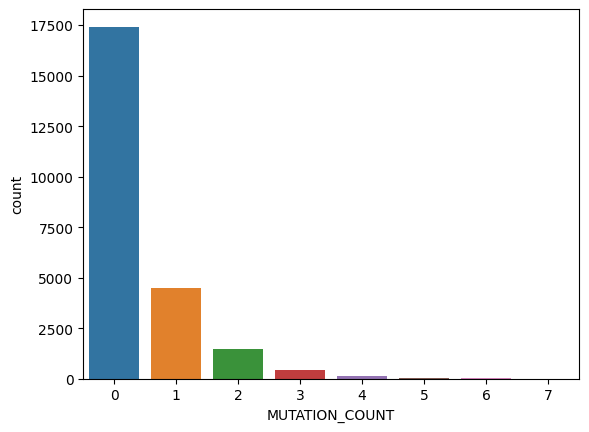

In [44]:
import seaborn as sns

sns.countplot(data=df_cd_custom, x='MUTATION_COUNT')
#g.set_xticklabels(rotation=30)

print("Clases: ", df_cd_custom['MUTATION_COUNT'].unique())
print(pd.merge(df_cd_custom.MUTATION_COUNT.value_counts(normalize=True).reset_index(drop=False), df_cd_custom.MUTATION_COUNT.value_counts(normalize=False).reset_index(drop=False), on='index'))

In [45]:
df_cd_custom.dtypes

CANCER_TYPE                    object
CANCER_TYPE_DETAILED           object
MUTATION_COUNT                  Int64
AGE                           float64
RACE                           object
SEX                            object
SMOKING_STATUS                 object
TIME_FROM_DX_TO_SEQ             Int64
TIME_TO_BLOOD_DRAW_FROM_TX      Int64
ALKYLATING_TX                  object
ANTHRACYCLINE_TX               object
ANTIMETABOLITE_TX              object
CARBOPLATIN_TX                 object
CHEMO_TX                       object
CISPLATIN_TX                   object
CYTOTOXIC_TX                   object
FOLIC_ACID_TX                  object
IO_TX                          object
MICROTUBULE_TX                 object
NUCLEOSIDE_TX                  object
OTHER_CYTOTOXIC_TX             object
OXALIPLATIN_TX                 object
PLATINUM_TX                    object
RADIOTHERAPY_TX                object
TARGETED_TX                    object
TAXANE_TX                      object
TOPO_II_TX  

In [46]:
dis_df_columns = df_cd_custom.select_dtypes(exclude=np.number).columns
num_df_columns = df_cd_custom.select_dtypes(include=np.number).columns

print('Discretas: ',dis_df_columns)
print('\nNuméricas: ',num_df_columns)

Discretas:  Index(['CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'RACE', 'SEX', 'SMOKING_STATUS',
       'ALKYLATING_TX', 'ANTHRACYCLINE_TX', 'ANTIMETABOLITE_TX',
       'CARBOPLATIN_TX', 'CHEMO_TX', 'CISPLATIN_TX', 'CYTOTOXIC_TX',
       'FOLIC_ACID_TX', 'IO_TX', 'MICROTUBULE_TX', 'NUCLEOSIDE_TX',
       'OTHER_CYTOTOXIC_TX', 'OXALIPLATIN_TX', 'PLATINUM_TX',
       'RADIOTHERAPY_TX', 'TARGETED_TX', 'TAXANE_TX', 'TOPO_II_TX',
       'TOPO_I_TX', 'XRT_TX'],
      dtype='object')

Numéricas:  Index(['MUTATION_COUNT', 'AGE', 'TIME_FROM_DX_TO_SEQ',
       'TIME_TO_BLOOD_DRAW_FROM_TX'],
      dtype='object')


In [47]:
num_values_dis_df_col = list(map(lambda col: (col,len(df_cd_custom[col].value_counts())), dis_df_columns))
num_values_dis_df_col

[('CANCER_TYPE', 49),
 ('CANCER_TYPE_DETAILED', 56),
 ('RACE', 4),
 ('SEX', 2),
 ('SMOKING_STATUS', 3),
 ('ALKYLATING_TX', 2),
 ('ANTHRACYCLINE_TX', 2),
 ('ANTIMETABOLITE_TX', 2),
 ('CARBOPLATIN_TX', 2),
 ('CHEMO_TX', 2),
 ('CISPLATIN_TX', 2),
 ('CYTOTOXIC_TX', 2),
 ('FOLIC_ACID_TX', 2),
 ('IO_TX', 2),
 ('MICROTUBULE_TX', 2),
 ('NUCLEOSIDE_TX', 2),
 ('OTHER_CYTOTOXIC_TX', 2),
 ('OXALIPLATIN_TX', 2),
 ('PLATINUM_TX', 2),
 ('RADIOTHERAPY_TX', 2),
 ('TARGETED_TX', 2),
 ('TAXANE_TX', 2),
 ('TOPO_II_TX', 2),
 ('TOPO_I_TX', 2),
 ('XRT_TX', 2)]

In [48]:
dis_df_col_bin = list(map(lambda cv: cv[0],(filter(lambda cv: cv[1]==2,num_values_dis_df_col))))
dis_df_col_bin

['SEX',
 'ALKYLATING_TX',
 'ANTHRACYCLINE_TX',
 'ANTIMETABOLITE_TX',
 'CARBOPLATIN_TX',
 'CHEMO_TX',
 'CISPLATIN_TX',
 'CYTOTOXIC_TX',
 'FOLIC_ACID_TX',
 'IO_TX',
 'MICROTUBULE_TX',
 'NUCLEOSIDE_TX',
 'OTHER_CYTOTOXIC_TX',
 'OXALIPLATIN_TX',
 'PLATINUM_TX',
 'RADIOTHERAPY_TX',
 'TARGETED_TX',
 'TAXANE_TX',
 'TOPO_II_TX',
 'TOPO_I_TX',
 'XRT_TX']

In [49]:
# Para gender --> Male=0, Female=1
# Pare el resto: --> No=0, Yes=1
def binarize_dis(df, dis_df_col_bin):
    for col in dis_df_col_bin:
        if 'Female' in df[col].unique():
            df[col] = (df[col]=='Female').apply(int)
        else:
            df[col] = (df[col]=='Yes').apply(int)
    #return df # No hace falta

# Comprueba si la función está bien sobre una copia de los datos
binarize_dis(df_cd_custom, dis_df_col_bin)
#df_cd_custom.head()

C:\Users\casalsg\AppData\Local\Temp\1\ipykernel_19364\977665869.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col]=='Female').apply(int)
C:\Users\casalsg\AppData\Local\Temp\1\ipykernel_19364\977665869.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = (df[col]=='Yes').apply(int)


In [50]:
df_cd_custom['SMOKING_STATUS'] = df_cd_custom['SMOKING_STATUS'].str.replace('Never smoker', '0').replace('Former Smoker', '0.5').replace('Current Smoker', '1').astype(float)
df_cd_custom.SMOKING_STATUS.unique()

C:\Users\casalsg\AppData\Local\Temp\1\ipykernel_19364\3768697798.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_custom['SMOKING_STATUS'] = df_cd_custom['SMOKING_STATUS'].str.replace('Never smoker', '0').replace('Former Smoker', '0.5').replace('Current Smoker', '1').astype(float)


array([0. , 0.5, 1. ])

In [51]:
df_cd_custom['RACE'] = df_cd_custom['RACE'].str.replace('White', '1').replace('Asian', '2').replace('Black', '3').replace('Other', '4').astype(int)

C:\Users\casalsg\AppData\Local\Temp\1\ipykernel_19364\2157276615.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cd_custom['RACE'] = df_cd_custom['RACE'].str.replace('White', '1').replace('Asian', '2').replace('Black', '3').replace('Other', '4').astype(int)


In [52]:
# Lista de funciones aplicadas en la preparación de los datos
data_prep_pipeline = []

# Características que serán consideradas categóricas y numéricas en el pipeline
cat_features = []
num_features = []

In [53]:
data_prep_pipeline.append(binarize_dis)

In [54]:
# Añade las variables
num_features.extend(dis_df_col_bin)
# Muestra las variables numéricas
print('Variables numéricas: ', num_features)

Variables numéricas:  ['SEX', 'ALKYLATING_TX', 'ANTHRACYCLINE_TX', 'ANTIMETABOLITE_TX', 'CARBOPLATIN_TX', 'CHEMO_TX', 'CISPLATIN_TX', 'CYTOTOXIC_TX', 'FOLIC_ACID_TX', 'IO_TX', 'MICROTUBULE_TX', 'NUCLEOSIDE_TX', 'OTHER_CYTOTOXIC_TX', 'OXALIPLATIN_TX', 'PLATINUM_TX', 'RADIOTHERAPY_TX', 'TARGETED_TX', 'TAXANE_TX', 'TOPO_II_TX', 'TOPO_I_TX', 'XRT_TX']


In [55]:
dis_df_columns_cat = list(map(lambda cv: cv[0],(filter(lambda cv: cv[1]>2 and cv[1]<5, num_values_dis_df_col))))
dis_df_columns_cat

['RACE', 'SMOKING_STATUS']

In [56]:
cat_features = dis_df_columns_cat[:]

In [57]:
print("\nPasos de preprocesamiento: ")
for step, function in enumerate(data_prep_pipeline):
    print("\t {:d}: {:s}".format(step, function.__name__))


Pasos de preprocesamiento: 
	 0: binarize_dis


In [58]:
print('Variables que se tratarán como categóricas: \n\t',cat_features, end='\n\n')
print('Variables que se tratarán como numéricas: \n\t',num_features)

Variables que se tratarán como categóricas: 
	 ['RACE', 'SMOKING_STATUS']

Variables que se tratarán como numéricas: 
	 ['SEX', 'ALKYLATING_TX', 'ANTHRACYCLINE_TX', 'ANTIMETABOLITE_TX', 'CARBOPLATIN_TX', 'CHEMO_TX', 'CISPLATIN_TX', 'CYTOTOXIC_TX', 'FOLIC_ACID_TX', 'IO_TX', 'MICROTUBULE_TX', 'NUCLEOSIDE_TX', 'OTHER_CYTOTOXIC_TX', 'OXALIPLATIN_TX', 'PLATINUM_TX', 'RADIOTHERAPY_TX', 'TARGETED_TX', 'TAXANE_TX', 'TOPO_II_TX', 'TOPO_I_TX', 'XRT_TX']


In [59]:
df_cd_custom.head(1)

,CANCER_TYPE,CANCER_TYPE_DETAILED,MUTATION_COUNT,AGE,RACE,SEX,SMOKING_STATUS,TIME_FROM_DX_TO_SEQ,TIME_TO_BLOOD_DRAW_FROM_TX,ALKYLATING_TX,...,NUCLEOSIDE_TX,OTHER_CYTOTOXIC_TX,OXALIPLATIN_TX,PLATINUM_TX,RADIOTHERAPY_TX,TARGETED_TX,TAXANE_TX,TOPO_II_TX,TOPO_I_TX,XRT_TX
0,Breast Cancer,Invasive Breast Carcinoma,2,39.739902,1,1,0.0,991,609,1,...,1,0,0,1,0,1,1,0,0,1


In [60]:
df_encoded = pd.get_dummies(df_cd_custom['CANCER_TYPE_DETAILED'], prefix='Categoria')
df_rf = pd.concat([df_cd_custom, df_encoded], axis=1).drop(['CANCER_TYPE', 'CANCER_TYPE_DETAILED'], axis=1)
df_rf.head(1)

,MUTATION_COUNT,AGE,RACE,SEX,SMOKING_STATUS,TIME_FROM_DX_TO_SEQ,TIME_TO_BLOOD_DRAW_FROM_TX,ALKYLATING_TX,ANTHRACYCLINE_TX,ANTIMETABOLITE_TX,...,Categoria_Pheochromocytoma,Categoria_Pineoblastoma,Categoria_Prostate Adenocarcinoma,Categoria_Renal Non-Clear Cell Carcinoma,Categoria_Retinoblastoma,Categoria_Salivary Carcinoma,Categoria_Thymic Carcinoma,Categoria_Vaginal Adenocarcinoma,Categoria_Well-Differentiated Neuroendocrine Tumor of the Appendix,Categoria_Wilms' Tumor
0,2,39.739902,1,1,0.0,991,609,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [61]:
df_rf.fillna(0, inplace=True)

In [62]:
def show_results(description, model, X_train, y_train, X_test, y_test, is_log=False):
    results = pd.DataFrame(columns=['Modelo','$R^2$ Entrenamiento','$R^2$ Validación','$R^2$ Test', 
                                         'MAE Entrenamiento', 'MAE Test']).set_index('Modelo')
    train_r2 = model.score(X_train,y_train)
    val_r2 = cross_val_score(model,X_train,y_train,cv=5).mean()
    test_r2 = model.score(X_test, y_test)
    
    # Si se utiliza el logaritmo de la variable objetivo hay que 
    # convertirlo para calcular el error
    f = np.exp if is_log else lambda y: y
    # Calcula el error    
    train_mae = mean_absolute_error(f(y_train), f(model.predict(X_train)))
    test_mae = mean_absolute_error(f(y_test), f(model.predict(X_test)))
    
    # Muetra los resultados en formato legible
    print('Training \t\txValidation \t\tTest')
    print('-------- \t\t----------- \t\t----')
    print(f"R\u00B2 = {train_r2:.3f}\t\tR\u00B2 = {val_r2:.3f}\t\tR\u00B2 = {test_r2:.3f}")
    print(f"MAE = {train_mae:.2f}\t\t\t\t\tMAE = {test_mae:.2f}")
    
    results.loc[description]= (train_r2, val_r2, test_r2, train_mae, test_mae)

In [63]:
from sklearn.model_selection import train_test_split

X = df_rf.drop(columns='MUTATION_COUNT').copy()
y = df_rf['MUTATION_COUNT'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

print(X_train.shape)
print(X_test.shape)

(16107, 82)
(7934, 82)


In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [82]:
parameters = {'max_depth':np.linspace(1,15,15).astype(int), 'min_samples_split':(2,4,6,8,10)}
search = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=parameters, cv=5).fit(X_train, y_train)
print(search.best_params_, end='\n\n')

tree = search.best_estimator_
description = 'Regression tree (FT)'
show_results(description, tree, X_train, y_train, X_test, y_test, True)

{'max_depth': 4, 'min_samples_split': 2}

Training 		xValidation 		Test
-------- 		----------- 		----
R² = 0.133		R² = 0.111		R² = 0.113
MAE = 2.48					MAE = 2.29


In [ ]:

parameters = {'max_depth':np.linspace(1,15,20).astype(int), 'min_samples_split':(2,4,6,8,10)}
search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, cv=5, error_score='raise').fit(X_train, y_train)
print(search.best_params_, end='\n\n')

rforest = search.best_estimator_

description = 'Random forest'
show_results(description, rforest, X_train, y_train, X_test, y_test)

In [370]:
description = 'Random forest'
show_results(description, rforest, X_train, y_train, X_test, y_test)

Training 		xValidation 		Test
-------- 		----------- 		----
R² = 0.165		R² = 0.125		R² = 0.128
MAE = 0.50					MAE = 0.50


In [73]:
parameters = {'alpha':np.logspace(-4, 4, 9, endpoint=True)}
search = GridSearchCV(estimator=Ridge(), param_grid=parameters, cv=5).fit(X_train, y_train)
print(search.best_params_, end='\n\n')

ridge_rel = search.best_estimator_
description = 'Ridge regression'
show_results(description, ridge_rel, X_train, y_train, X_test, y_test)

{'alpha': 100.0}

Training 		xValidation 		Test
-------- 		----------- 		----
R² = 0.119		R² = 0.112		R² = 0.115
MAE = 0.53					MAE = 0.53


In [81]:
pipe_knn = Pipeline([ 
    ('scaler', StandardScaler()),
    ('knn', KNeighborsRegressor())])

parameters = {'knn__n_neighbors':(1,5,10,15,20), 'knn__weights':('uniform','distance')}
search = GridSearchCV(estimator=pipe_knn, param_grid=parameters, cv=5).fit(X_train, y_train)
print(search.best_params_, end='\n\n')

knn = search.best_estimator_
description = 'k-NN (STD)'
show_results(description, knn, X_train, y_train, X_test, y_test)

{'knn__n_neighbors': 20, 'knn__weights': 'uniform'}

Training 		xValidation 		Test
-------- 		----------- 		----
R² = 0.143		R² = 0.050		R² = 0.039
MAE = 0.50					MAE = 0.53


In [70]:
#df_backup  = df_rf.copy()
df_rf  = df_backup.copy()
df_rf = df_rf[df_rf['MUTATION_COUNT']!=0]

In [71]:
from sklearn.model_selection import train_test_split

X = df_rf.drop(columns='MUTATION_COUNT').copy()
y = df_rf['MUTATION_COUNT'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0, stratify=y)

print(X_train.shape)
print(X_test.shape)

(4436, 82)
(2185, 82)


In [72]:
import numpy as np
unique_labels = np.unique(y_test)
print(unique_labels)

[1 2 3 4 5 6 7]


In [74]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score

# Assuming 'MUTATION_COUNT' is your target variable
num_bins = 7  # Adjust the number of bins based on your data distribution
y_train_bins = pd.cut(y_train, bins=num_bins, labels=False)
y_test_bins = pd.cut(y_test, bins=num_bins, labels=False)


svm_model = SVC()

parameters = {'C': [10e-2, 1, 100], 'kernel': ['linear', 'rbf']}

f1_scorer = make_scorer(f1_score, average='weighted')
GS = GridSearchCV(estimator=svm_model, param_grid=parameters, scoring=f1_scorer, cv=5)
GS.fit(X_train, y_train_bins)

print("Mejor score: ", GS.best_score_)
print("Mejore configuración de parámetros: ", GS.best_params_)

svc = GS.best_estimator_

# Assuming show_results takes encoded labels
y_pred_bins = svc.predict(X_test)
# Evaluate the classification model
accuracy = accuracy_score(y_test_bins, y_pred_bins)
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)
classification_rep = classification_report(y_test_bins, y_pred_bins)

# Display the classification results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

c:\Users\casalsg\Anaconda3\envs\cidaen\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Mejor score:  0.5628535808498464
Mejore configuración de parámetros:  {'C': 100, 'kernel': 'linear'}
Accuracy: 0.65

Confusion Matrix:
[[1383   59   24    9    2    2    3]
 [ 432   31    9    3    2    2    1]
 [ 134    9    3    0    0    0    1]
 [  45    0    3    1    0    0    0]
 [  15    3    0    0    0    0    0]
 [   7    0    0    0    0    0    0]
 [   2    0    0    0    0    0    0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.93      0.79      1482
           1       0.30      0.06      0.11       480
           2       0.08      0.02      0.03       147
           3       0.08      0.02      0.03        49
           4       0.00      0.00      0.00        18
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         2

    accuracy                           0.65      2185
   macro avg       0.16      0.15      0.14      2185
weighted avg       0.54      0.6

In [ ]:

# Now y_train_bins and y_test_bins are discrete labels suitable for classification

# Continue with the SVC model as before...
svc_model = SVC(kernel='linear', C=1)
svc_model.fit(X_train, y_train_bins)
y_pred_bins = svc_model.predict(X_test)

# Evaluate the classification model
accuracy = accuracy_score(y_test_bins, y_pred_bins)
conf_matrix = confusion_matrix(y_test_bins, y_pred_bins)
classification_rep = classification_report(y_test_bins, y_pred_bins)

# Display the classification results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(classification_rep)

